In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs 

In [81]:
np.set_printoptions(threshold=100000)
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42)
X.shape

(1000, 2)

In [189]:
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k
        self.centroids = []
        
    def fit(self, X: np.ndarray) -> None:
        self.labels = np.zeros(X.shape[0])
    
    def init_centroids(self, X: np.ndarray) -> np.ndarray:
        self.centroids.append(X[np.random.randint(0, X.shape[0])])
        
        for i in range(self.k - 1):
            distances = np.array([])
            
            for d in range(X.shape[0]):
                distances = np.append(distances, np.linalg.norm(X[d] - self.centroids[-1]))
            
            distances = (distances - min(distances)) / (max(distances) - min(distances))
            distances = distances / sum(distances)
                    
            self.centroids.append(X[np.random.choice(range(0, X.shape[0]), size=1, replace=True, p=distances)][0])
        self.centroids = np.array(self.centroids, dtype=object)

In [190]:
kmeans = KMeans(k=3)
#print(np.nan in kmeans.init_centroids(X))

In [191]:
kmeans.init_centroids(X)

In [193]:
kmeans.centroids

array([[-0.19453905637924152, 7.147020935606573],
       [-7.456137591877989, -9.471151885420856],
       [3.055976012742378, 2.7335843400850295]], dtype=object)

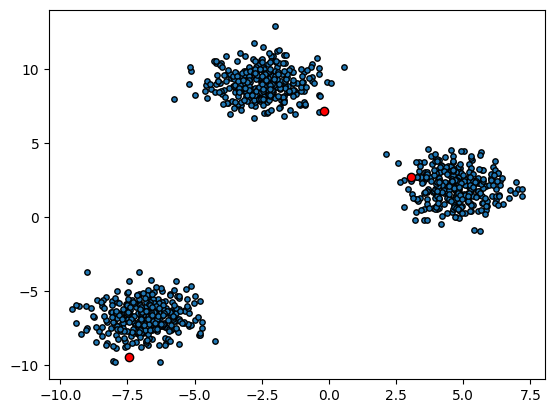

In [197]:
plt.scatter(X[:,0], X[:,1], edgecolors='black', s=15, zorder=1);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:, 1], c='red', edgecolors='black', zorder=2);